In [157]:
import pandas as pd 
import numpy as np 
import os 
import csv
pd.set_option('display.max_colwidth', -1)

In [3]:
os.chdir(r'C:\Users\Bijan\Desktop\fuzzy_files')

In [22]:
with open('fuzz_log.txt','rb') as f :
    

In [159]:
timestamp=[]
response_time=[]
ip=[]
text=[]

In [160]:
with open("fuzz_log.txt",'r',encoding="utf8") as f:
    c = csv.reader(f, delimiter=' ', skipinitialspace=True)
    for line in c:
        if 'OK' in line:
            timestamp.append(line[0]+' '+ line[1])
            response_time.append(line[2])
            ip.append(line[3])
            text.append(''.join(line[5:-2]))

In [161]:
df=pd.DataFrame({'timestamp':timestamp,"response_time":response_time,"ip":ip,'searched_text':text})

In [162]:
df.head()

,ip,response_time,searched_text,timestamp
0,10.20.15.193,0.11055135726928711,http/vehicle/sif?,[2018-Feb-08 14:17]
1,10.20.15.193,0.11810517311096191,http/vehicle/sift?,[2018-Feb-08 14:17]
2,10.20.15.193,0.10148262977600098,http/vehicle/swi?,[2018-Feb-08 14:17]
3,10.20.15.193,0.09942364692687988,http/vehicle/swif?,[2018-Feb-08 14:17]
4,10.20.15.193,0.11459016799926758,http/vehicle/swiftz?,[2018-Feb-08 14:17]


In [163]:
df['timestamp']=df['timestamp'].map(lambda x: x.lstrip('[').rstrip(']'))

In [164]:
df['timestamp']=pd.to_datetime(df.timestamp)

In [165]:
df['response_time']=df['response_time'].astype('float')

# plotting response time 

In [166]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import bokeh 

### 1. mean response time

In [167]:
df.response_time.mean()

0.13590450247123786

### 2. median response time

In [194]:
df.response_time.median()

0.12009358406066895

### 3. Standard deviation of response time

In [169]:
df.response_time.std()

0.06780074159392784

### 4. plotting

In [170]:
fig=plt.figure()

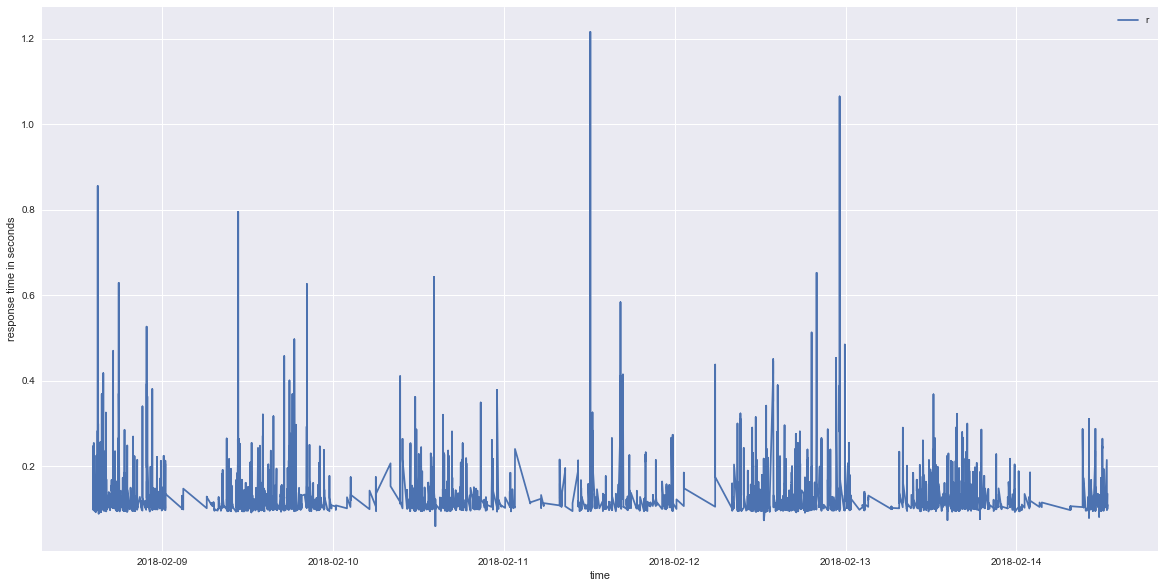

In [171]:
plt.figure(figsize=(20,10))
plt.plot(df.timestamp,df.response_time)
plt.legend('response- time ')
plt.xlabel('time')
plt.ylabel('response time in seconds')
plt.show()

In [175]:
df.sort_values(by='response_time',ascending=False)[0:10]

,ip,response_time,searched_text,timestamp
4102,10.20.15.193,1.216219,http/vehicle/MarutiSuzukiSwiftVxiAbs(1298cc)(Petrol?,2018-02-11 12:09:00
4104,10.20.16.120,1.181865,http/vehicle/MarutiSuzukiSwiftVxiAbs(1298?,2018-02-11 12:09:00
4105,10.20.16.120,1.100674,http/vehicle/MarutiSuzukiSwiftVxiAbs(129?,2018-02-11 12:09:00
4106,10.20.16.120,1.077967,http/vehicle/Mariyualtok?,2018-02-11 12:09:00
6027,10.20.15.193,1.065219,http/vehicle/HyundaiGrandi101.2kappaDualVtvt5spSpo(1197cc)(Petrol)?,2018-02-12 23:10:00
4101,10.20.16.120,1.055851,http/vehicle/MarutiSuzukiSwiftVxiAbs(1298c?,2018-02-11 12:09:00
4100,10.20.16.120,1.013644,http/vehicle/MarutiSuzukiSwiftVxiAbs(1298cc?,2018-02-11 12:09:00
6028,10.20.15.193,0.988339,http/vehicle/HyundaiGrandi101.2kappaDualVtvt5spSp(1197cc)(Petrol)?,2018-02-12 23:10:00
4108,10.20.16.120,0.987498,http/vehicle/MarutiSuzukiSwiftVxiAbs(1298cc)?,2018-02-11 12:09:00
4110,10.20.15.193,0.957844,http/vehicle/MarutiSuzukiSwiftVxiAbs?,2018-02-11 12:09:00


In [156]:
print(df.loc[[4102],'searched_text'])

4102    http/vehicle/MarutiSuzukiSwiftVxiAbs(1298cc)(P...
Name: searched_text, dtype: object


## frequency distribution(%)

Text(0,0.5,'frequency (%)')

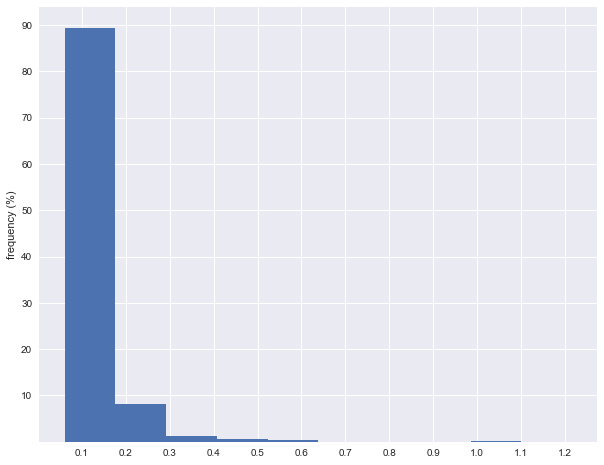

In [193]:
df['response_time'].plot(kind='hist',figsize=(10,8),weights=np.ones_like(df[df.columns[1]]) * 100. / len(df),
                         xticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2],
                        yticks=[10,20,30,40,50,60,70,80,90])
plt.ylabel('frequency (%)')

#  plotting in seaborn 

In [93]:
import seaborn as sns
sns.set(color_codes=True)

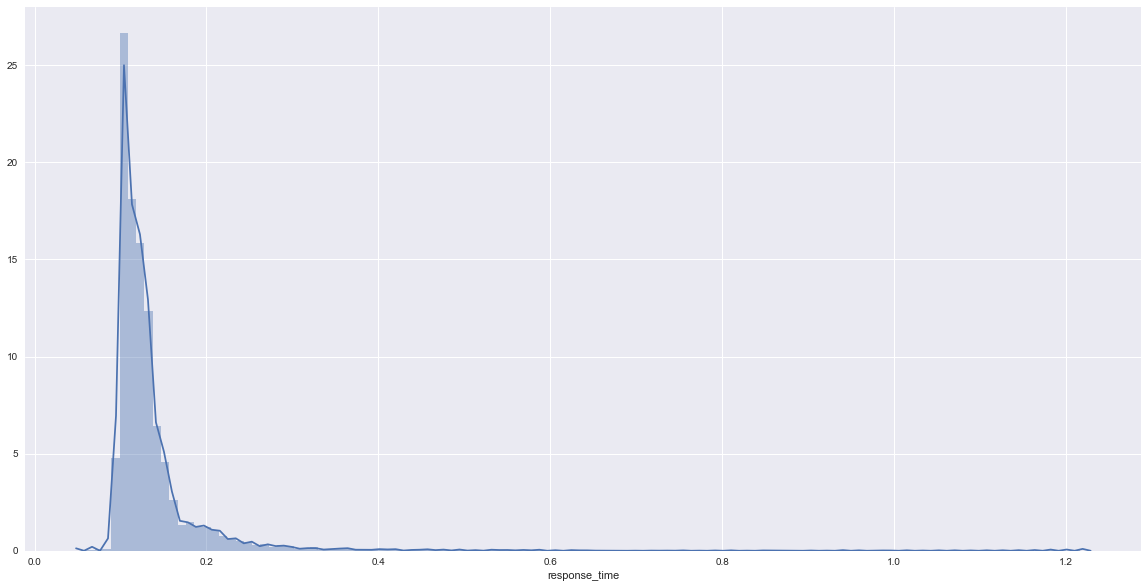

In [104]:
plt.figure(figsize=(20,10))
sns.distplot(df.response_time,bins=120)